# Problem 2

In [2]:
# imports
from scipy.integrate import quad

### a

In [3]:
def X(z, Omega_m=.3, Omega_lambda=.7, h=.7):
    H_0 = 100*h # [km/s/Mpc]
    def f(z):
        return H_0**(-1)*(Omega_m*(1+z)**3 + Omega_lambda)**(-1/2) * 3*10**5 # returns in Mpc
    return quad(f, 0, z,)[0]

X(1, h=.67)

3454.1510437066167

### b

In [10]:
def t(a, Omega_m=.3, Omega_lambda=.7, Omega_r = 9e-5, h=.67):
    H_0 = 1.023*h * 1e-10 # [yr^-1]
    def f(a):
        return H_0**(-1)*(Omega_m*a**-1 + Omega_r*a**-2 + Omega_lambda*a**2)**(-1/2) 
    return quad(f, 0, a,)[0] # returns in yrs

print(t(a=.5, Omega_r=0))

6007492608.334738


## Problem 3

In [19]:
t(1.8*10**-4)

21142.24538119176

## Problem 6

In [76]:
from camb import get_matter_power_interpolator
import matplotlib.pyplot as plt
import numpy as np

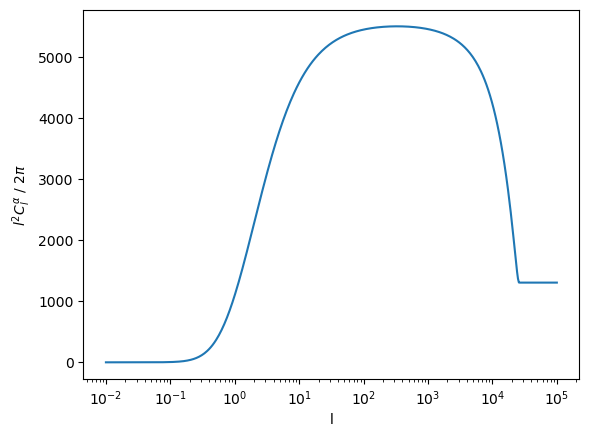

In [94]:
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)
P_delta = get_matter_power_interpolator(pars)

x_1 = X(1)
Omega_m = .3
h = .7
H_0 = 100*h / 3e5 # km/s*Mpc / c = 1/Mpc
def C_lalpha(l):
    def integrand(z):
        a = 1/(1+z)
        x = X(z)
        power = P_delta(0, (l+.5)/x) * h**3
        return ((3*Omega_m*H_0**2)/(2*a*((l+.5)/x)**2))**2 * (1-x/x_1)**2 * power
    
    return 4*l**2 * quad(integrand, 0, 10,)[0]

ls = np.logspace(-2,5, 500)
Cs = [l**2/(2*np.pi)*C_lalpha(l) for l in ls]

plt.plot(ls,Cs)
plt.xlabel("l")
plt.ylabel("$l^2C_l^\\alpha\ /\ 2\pi$")
plt.xscale('log')

In [68]:
C_lalpha(50)

1.9550343246888995e+17

In [62]:
X(1e6)

14148.96148527274

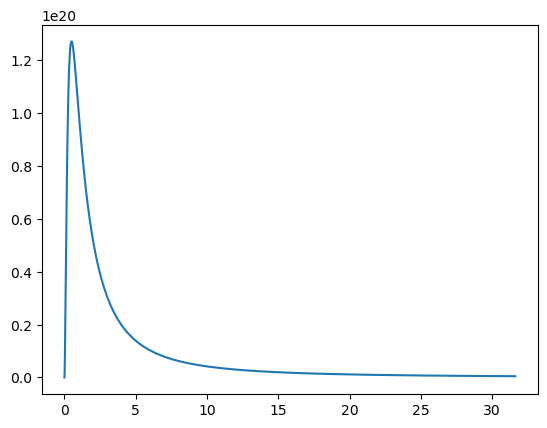

In [72]:
import matplotlib.pyplot as plt
ls = np.logspace(-15,1.5, 500)
Cs = [C_lalpha(l) for l in ls]
plt.plot(ls,Cs)

In [38]:
X(.000000000000001)

4.285714285714285e-12